much code re-used from James Bagrow (http://bagrow.com/ds1/)

In [1]:
# make figures better:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
font = {'weight':'normal','size':22}
matplotlib.rc('font', **font)
matplotlib.rc('figure', figsize=(9.0, 6.0))
matplotlib.rc('xtick.major', pad=10) # xticks too close to border!

import scipy, scipy.stats
import numpy as np

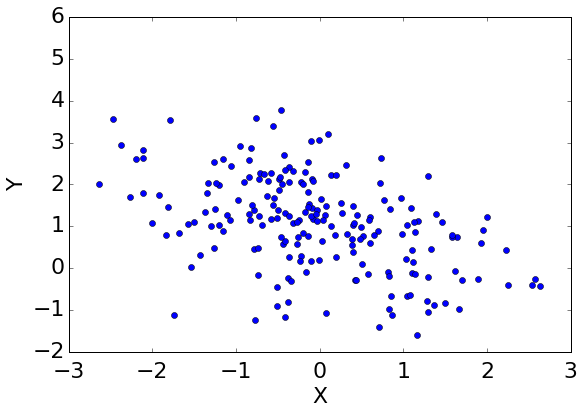

In [2]:
# some xy data:
a = -0.5
b = 1
n = 200
x = np.random.randn(n)
y = a*x + b + 1*np.random.randn(n)

# plot the data:
plt.plot(x,y,'o')
plt.xlabel("X"); plt.ylabel('Y');
plt.ylim([-2,6])
plt.xlim([-3,3])
plt.savefig("figures/data.png",dpi=600,bbox_inches="tight")

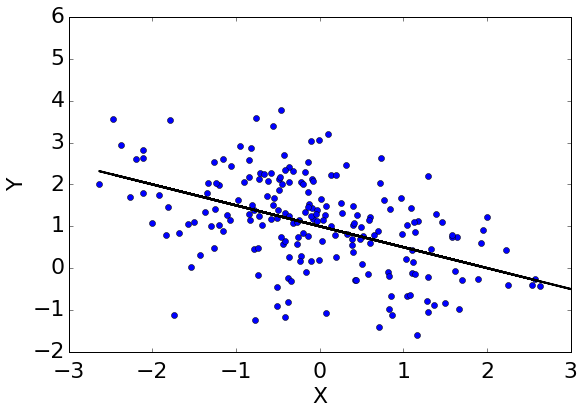

In [3]:
plt.plot(x,y, 'o')
plt.plot(x,a*x+b,'k-',linewidth=2)
plt.xlabel("X")
plt.ylabel('Y')
plt.ylim([-2,6])
plt.xlim([-3,3])
plt.savefig("figures/good.png",dpi=600,bbox_inches="tight")
plt.show()

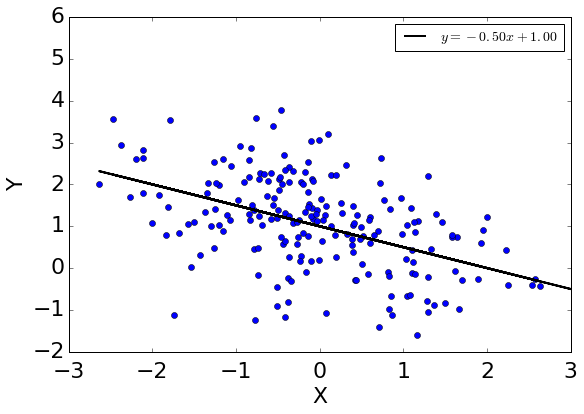

In [4]:
plt.plot(x,y, 'o',label=None)
plt.plot(x,a*x+b,'k-',linewidth=2,label="$y={0:.2f}x+{1:.2f}$".format(a,b))
plt.xlabel("X")
plt.ylabel('Y')
plt.legend(fontsize=14)
plt.ylim([-2,6])
plt.xlim([-3,3])
plt.savefig("figures/better.png",dpi=600,bbox_inches="tight")
plt.show()

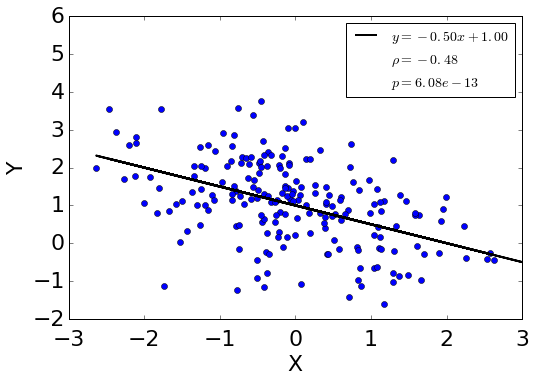

In [5]:
from matplotlib.patches import Rectangle
fig = plt.figure()
ax = fig.add_axes([.2,.2,.7,.7])
ax.plot(x,y, 'o',label=None)
rho,p = scipy.stats.pearsonr(x,y)
ax.plot(x,a*x+b,'k-',linewidth=2,label="$y={0:.2f}x+{1:.2f}$".format(a,b))
ax.add_patch(Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0,label="$\\rho={0:.2f}$".format(rho)))
ax.add_patch(Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0,label="$p={0:.2e}$".format(p)))
ax.set_xlabel("X")
ax.set_ylabel('Y')
ax.set_ylim([-2,6])
ax.set_xlim([-3,3])
plt.legend(fontsize=14)
plt.savefig("figures/better-yet.png",dpi=600,bbox_inches="tight")
plt.show()

In [6]:
def linregress_CIs(xd,yd,conf=0.95):
    """Linear regression CIs FTW! xd and yd are numpy arrays 
    containing the XY-data.
    
    For derivation see most stats texts, for example Ch 12 of:
    
    Mendenhall, W., Beaver, R., & Beaver, B. (2012). Introduction 
    to probability and statistics. Cengage Learning.
    
    This assumes underlying errors are iid gaussian.
    """
    alpha=1.-conf # significance
    n = xd.size   # data sample size
    x = np.linspace(xd.min(),xd.max(),100)
        
    # Predicted values from fitted model:
    a, b, r, p, err = scipy.stats.linregress(xd,yd)
    y = a*x+b
    
    sd = 1./(n-2.)*np.sum((yd-a*xd-b)**2)
    sd = np.sqrt(sd)
    sxd = np.sum((xd-xd.mean())**2)
    sx  = (x-xd.mean())**2
    
    # quantile of student's t distribution for p=1-alpha/2
    q = scipy.stats.t.ppf(1.-alpha/2, n-2)
    
    # get the upper and lower CI:
    dy = q*sd*np.sqrt( 1./n + sx/sxd )
    yl = y-dy
    yu = y+dy
    
    return yl,yu,x

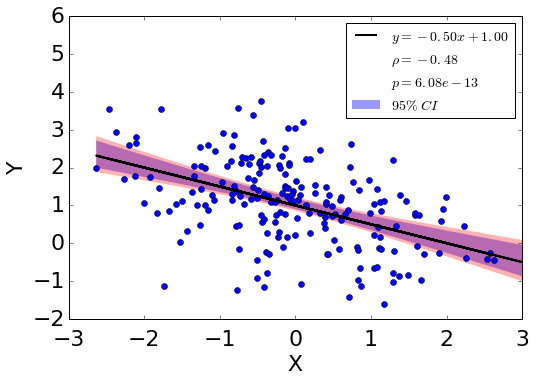

In [7]:
yl, yu, xci  = linregress_CIs(x,y, conf=0.95)
yl9,yu9,xci9 = linregress_CIs(x,y, conf=0.99)

fig = plt.figure()
ax = fig.add_axes([.2,.2,.7,.7])
ax.plot(x,y, 'o')
ax.plot(x,a*x+b,'k-',linewidth=2,label="$y={0:.2f}x+{1:.2f}$".format(a,b),zorder=10)
ax.fill_between(xci, yl9, yu9, alpha=0.3, facecolor='red',edgecolor='none',zorder=2)
ax.fill_between(xci, yl, yu,   alpha=0.4, facecolor='blue', edgecolor='none',label="$95\\%\\,\\,CI$",zorder=0)
ax.add_patch(Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0,label="$\\rho={0:.2f}$".format(rho),zorder=0))
ax.add_patch(Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0,label="$p={0:.2e}$".format(p),zorder=0))
ax.set_xlabel("X")
ax.set_ylabel('Y')
ax.set_ylim([-2,6])
ax.set_xlim([-3,3])
plt.legend(fontsize=14)
plt.savefig("figures/best.png",dpi=600,bbox_inches="tight")
plt.show()